last edited on May 24, 2019, updated and cleaned up on June 24, 2019

# Get Summary Stats of Simulations
this gets summary stats of simulations, csv is also saved to personal computer, a little messy but does work!

In [1]:
#!/bin/env python

#SBATCH --job-name=stat_full
#SBATCH --output=statplt_%j.out
#SBATCH --time=24:05:00
#SBATCH --partition=bigmem2
#SBATCH --nodes=1
#SBATCH --mem=0
# #SBATCH --exclusive
# this one did work

# import packages
import numpy as np
from scipy.signal import get_window, csd
from scipy.signal.windows import hann, hanning, nuttall, flattop
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

import matplotlib.pyplot as plt

import scipy.integrate as sciint
import pandas as pd
import datetime
import matplotlib.cm as cm
from math import pi
import matplotlib.ticker as tck
import datetime
from sympy import solve, Poly, Eq, Function, exp, re, im
from netCDF4 import Dataset, num2date # This is to read .nc files and time array
from scipy.optimize import fsolve
from decimal import Decimal
import pickle
import multiprocessing as mp
from joblib import Parallel, delayed
import matplotlib.colors as colors
from seaborn import cubehelix_palette #for contour plot colors
import seaborn as sns
from decimal import Decimal
import numpy.ma as ma
from scipy.stats import skew


# get file names and collect sims
from os import walk
import pickle

flabs = []
for (dirpath, dirnames, filenames) in walk('gphfiles/'):
    flabs.extend(filenames)
    break

f = []
for (dirpath, dirnames, filenames) in walk('/scratch/midway2/clairev/from_home/01_full_sims/'):
    f.extend(filenames)
    break
    
jjj = 0


In [2]:
f = []
for (dirpath, dirnames, filenames) in walk('scratch-midway2/enso_sims/'):
    f.extend(filenames)
    break

In [3]:
seasons = ["winter", "spring", "summer", "fall"]
ens = ["nino", "nina", "neutral"]
d2_names = [enso + " " + part for part in seasons for enso in ens]

for wantfile in range(len(flabs)):
    index = str(flabs[wantfile][-10:-5])
    
    # get detrend 
    ring = 'detrended/new_detrend_' + str(index) + '.h5'
    
    data_store = pd.HDFStore(ring)
    
    # Retrieve data using key
    untrend_df = data_store['untrend_geopot']
    data_store.close()

    seasons = ["winter","spring","summer","fall"]
    # write flatten function
    
    untrend_df["seasonmean"] = untrend_df.groupby(by=['year','season'])['adj_z'].transform('mean')
    untrend_df["diff_mean"] = untrend_df["adj_z"] - untrend_df["seasonmean"]
    

In [8]:
storage_list[0]

['58.5Nnino winter',
 509.8705139015072,
 (-0.15950769881999285-0.016854110781558046j)]

In [9]:

for wantfile in range(1,len(flabs)):
    index = str(flabs[wantfile][-10:-5])
# go through sims to get the correct ones
    sims = []
    for name in f:
        if name[8:13] == flabs[wantfile][-10:-5]:
            print(name)
            file_pickle = open("scratch-midway2/enso_sims/" + name, "rb")
            sims1 = pickle.load(file_pickle)
            
            sims.append(sims1)
            
    flatten = lambda l: [item for sublist in l for item in sublist]
    #flatten each 
    flat_sims = [[flatten(entry) for entry in sublist] for sublist in sims]       
    
    for j in range(12):
        flat_all = []
        for k in range(len(flat_sims)):
            flat_tested = flat_sims[k]
            flat_all.append(flat_tested[j])
    
        flat_all = flatten(flat_all)
        
        act_var = np.var(flat_all)
        act_skew = skew(flat_all, axis = None)
        
        storage_list.append([str(index) + str(d2_names[j]), act_var, act_skew])
        

01_enso_31.5S96
01_enso_31.5S657
01_enso_31.5S995
01_enso_31.5S73
01_enso_31.5S608
01_enso_31.5S194
01_enso_31.5S542
01_enso_31.5S34
01_enso_31.5S465
01_enso_31.5S156
01_enso_45.0N629
01_enso_45.0N191
01_enso_45.0N192
01_enso_45.0N99
01_enso_45.0N977
01_enso_45.0N691
01_enso_45.0N931
01_enso_45.0N222
01_enso_45.0N219
01_enso_45.0N538
01_enso_45.0N498
01_enso_45.0S527
01_enso_45.0S396
01_enso_45.0S405
01_enso_45.0S626
01_enso_45.0S48
01_enso_45.0S305
01_enso_45.0S235
01_enso_45.0S350
01_enso_45.0S784
01_enso_45.0S120
01_enso_45.0S537
01_enso_58.5S646
01_enso_58.5S609
01_enso_58.5S631
01_enso_58.5S579
01_enso_58.5S849
01_enso_58.5S878
01_enso_58.5S577
01_enso_58.5S888
01_enso_58.5S664
01_enso_58.5S242
01_enso_58.5S979
01_enso_54.0S193
01_enso_54.0S392
01_enso_54.0S723
01_enso_54.0S917
01_enso_54.0S610
01_enso_54.0S905
01_enso_54.0S339
01_enso_54.0S428
01_enso_54.0S481
01_enso_54.0S546
01_enso_54.0S399
01_enso_49.5S432
01_enso_49.5S506
01_enso_49.5S123
01_enso_49.5S605
01_enso_49.5S144
01

ValueError: buffer size does not match array size

In [11]:
import csv

with open('enso_stat', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(storage_list)


In [21]:
skew_list = np.real([entry[2] for entry in storage_list])
var_list = np.real([entry[1] for entry in storage_list])
name_list = np.real([entry[0] for entry in storage_list])

In [26]:
todo = {"name":name_list, "var": var_list, "skew":skew_list}

In [29]:
import pandas
df = pandas.DataFrame(todo)
df.to_csv("enso_stat_2.csv", sep=',',index=False)

,name,skew,var
0,58.5Nnino winter,-0.159508,509.870514
1,58.5Nnina winter,-0.429642,502.625568
2,58.5Nneutral winter,-0.321109,542.798842
3,58.5Nnino spring,-1.050231,384.394635
4,58.5Nnina spring,0.290616,367.455810
5,58.5Nneutral spring,0.805822,352.839923
6,58.5Nnino summer,1.522569,234.396411
7,58.5Nnina summer,-5.972210,230.384690
8,58.5Nneutral summer,1.357973,217.620277
9,58.5Nnino fall,0.321617,379.411534


In [ ]:
storage_list = []
for wantfile in flabs:
    index = str(wantfile[-10:-5])
    ring = 'detrended/new_detrend_' + str(index) + '.h5'
    data_store = pd.HDFStore(ring)
    
    
    
    # Retrieve data using key
    untrend_df = data_store.select("untrend_geopot")
    untrend_df['adj_z'] = untrend_df['adj_z'].astype(np.float)
    # get stats from each thing
    untrend_df["season_mean"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('mean')
    # get stats from each thing
    untrend_df["season_variance"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('var')

    # get stats from each thing
    untrend_df["diff_from_season"] = untrend_df["adj_z"] - untrend_df["season_mean"]
    
    #actual means
    act_skew = untrend_df.groupby(['season'])['diff_from_season'].skew()
    act_var = untrend_df.groupby(['season'])['diff_from_season'].var()
    
    
    storage_list.append([index,act_var,act_skew])

In [5]:
seasons = ["winter", "spring", "summer", "fall"]
ens = ["nino", "nina", "neutral"]
d2_names = [enso + " " + part for part in seasons for enso in ens]

In [6]:
flatten = lambda l: [item for sublist in l for item in sublist]
    #flatten each 
flat_sims = [[flatten(entry) for entry in sublist] for sublist in sims]

hi


<Figure size 432x288 with 0 Axes>

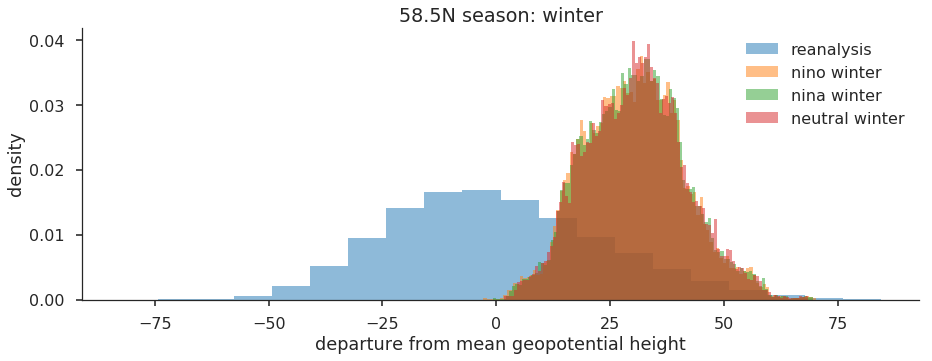

hi


<Figure size 432x288 with 0 Axes>

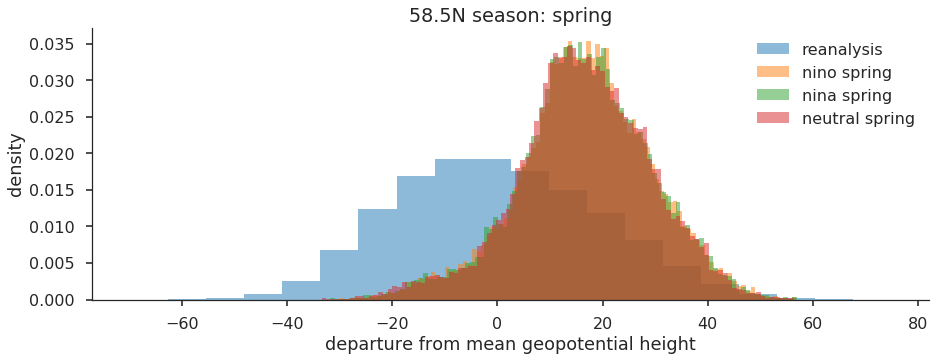

hi


<Figure size 432x288 with 0 Axes>

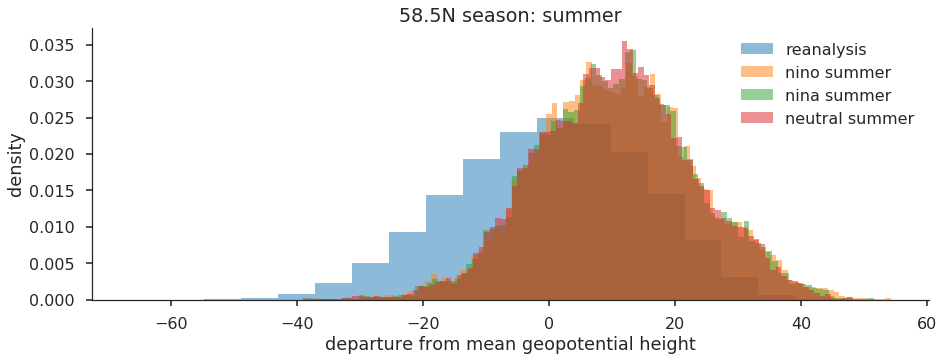

hi


<Figure size 432x288 with 0 Axes>

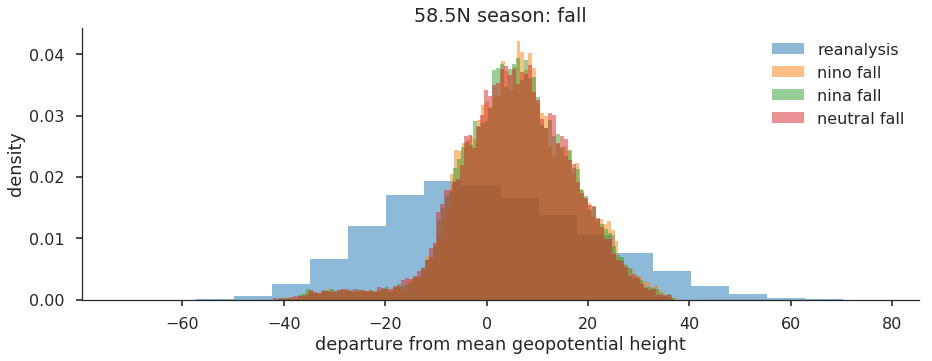

In [9]:
for j in range(4):
    plt.clf();
    plt.figure(figsize=(15, 5));
    plt.hist(x = np.real(untrend_df[untrend_df["season"] == seasons[j]]["diff_mean"]), 
                 bins = 20, density = True, 
                 alpha = 0.5, label = "reanalysis")
    
        
    flat_all = []
    for k in range(len(flat_sims)):
        flat_tested = flat_sims[k]
        flat_all.append(flat_tested[j])
        
        
       
    flat_all = flatten(flat_all)
    for k in range(3):
        #print("hi")
        plt.hist(x = np.real(flat_all[j*3 + k]), bins = 100, 
                 density = True, alpha = 0.5, label = d2_names[j*3 + k])
        
    plt.ylabel("density")
    plt.legend()
    plt.xlabel("departure from mean geopotential height")
    plt.title(str(flabs[wantfile][-10:-5]) + " season: " +str(seasons[j]))
    
    # formatting
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.despine() 
    plt.show()
        
        

In [31]:
 for j in range(4):
        
    flat_all = []
    for k in range(len(sims)):
        flat_tested = flat_sims[k]
        
        flat_all.append(flat_tested[j])

In [33]:
len(flat_all[0])

6606240

In [47]:
wantfile = 0
    
index = str(flabs[wantfile][-10:-5])
    
# get detrend 
ring = 'detrended/new_detrend_' + str(index) + '.h5'
    
data_store = pd.HDFStore(ring)

In [48]:
storage_list = []
for wantfile in flabs:
    index = str(wantfile[-10:-5])
    ring = 'detrended/new_detrend_' + str(index) + '.h5'
    data_store = pd.HDFStore(ring)
    
    
    
    # Retrieve data using key
    untrend_df = data_store.select("untrend_geopot")
    untrend_df['adj_z'] = untrend_df['adj_z'].astype(np.float)
    # get stats from each thing
    untrend_df["season_mean"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('mean')
    # get stats from each thing
    untrend_df["season_variance"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('var')

    # get stats from each thing
    untrend_df["diff_from_season"] = untrend_df["adj_z"] - untrend_df["season_mean"]
    
    #actual means
    act_skew = untrend_df.groupby(['season'])['diff_from_season'].skew()
    act_var = untrend_df.groupby(['season'])['diff_from_season'].var()
    
    
    storage_list.append([index,act_var,act_skew])

/home/clairev/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:702: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [49]:
len(storage_list)

13

In [28]:
# Retrieve data using key
untrend_df = data_store.select("untrend_geopot")
untrend_df['adj_z'] = untrend_df['adj_z'].astype(np.float)

In [29]:
# get stats from each thing
untrend_df["season_mean"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('mean')
# get stats from each thing
untrend_df["season_variance"] = untrend_df.groupby(['season', "year"])['adj_z'].transform('var')

# get stats from each thing
untrend_df["diff_from_season"] = untrend_df["adj_z"] - untrend_df["season_mean"]

In [70]:
#actual means
act_skew = untrend_df.groupby(['season'])['diff_from_season'].skew()
act_var = untrend_df.groupby(['season'])['diff_from_season'].var()

In [31]:
season_df = untrend_df[untrend_df["season"] == "fall"]

In [32]:
test_vals = season_df["diff_from_season"]

In [35]:
#test_vals

In [34]:
test_skew = skew(test_vals)

In [71]:
act_skew

season
fall     -0.407854
spring   -0.431184
summer   -0.595719
winter   -0.210709
Name: diff_from_season, dtype: float64

In [66]:
test_skew = untrend_df.groupby(['season',"year"])['diff_from_season'].skew()

In [69]:
np.average(test_skew["fall"]) # honestly its pretty close so im going to use that.. 

-0.40382844767999915

In [37]:
act_var # have variance

season
fall      389.564229
spring    358.382595
summer    223.546377
winter    532.385968
Name: diff_from_season, dtype: float64

In [36]:
act_skew # now repeat this many times

season
fall      0.256179
spring    0.168065
summer   -0.184236
winter    0.302864
Name: diff_from_season, dtype: float64

In [ ]:
# get stats from each thing
untrend_df["season_mean"] = df["sst_seasdiff"].sub(df.groupby('year_num')["sst_seasdiff"].transform('mean'))

In [59]:
f[0:20]


[]

In [58]:
seasons = ["winter","spring","summer","fall"]
# write flatten function
winter_means = list(untrend_df[untrend_df["season"]
                                   == seasons[0]].groupby(['lon'])["adj_z"].mean())
spring_means = list(untrend_df[untrend_df["season"] 
                                   == seasons[1]].groupby(['lon'])["adj_z"].mean())
summer_means = list(untrend_df[untrend_df["season"] 
                                   == seasons[2]].groupby(['lon'])["adj_z"].mean())
fall_means = list(untrend_df[untrend_df["season"]
                                 == seasons[3]].groupby(['lon'])["adj_z"].mean())

all_means = [winter_means, spring_means, summer_means, fall_means]
    
# go through sims to get the correct ones
sims = []
for name in f[0:20]:
    print(name)
    if name[4:9] == flabs[wantfile][-10:-5]:
        file_pickle = open("/scratch/midway2/clairev/from_home/01_full_sims/" + name, "rb")
        sims1 = pickle.load(file_pickle, encoding = "latin1", fix_imports=True)
        newsims = [[list(np.add(sims1[season][0][j],
                                    np.real(all_means[season][j]))) 
                        for j in range(len(sims1[season][0]))]
                       for season in range(4)]
        sims.append(newsims)
     
    
flatten = lambda l: [item for sublist in l for item in sublist]
    #flatten each 
flat_sims = [[flatten(entry) for entry in sublist] for sublist in sims]   

In [46]:
sertest = (entry for entry in sims)

In [1]:
# teststack = np.dstack((sims[0], sims[1]))
# flatten around last axis
# newstack = [[flatten(entry) for entry in season] for season in teststack]

In [52]:
runnumber = len(sims)
entry_len = len(sims[0][0][0])

lon_skew = [[skew(entry) for entry in season] for season in newstack]

full_skew = [skew(season) for season in newstack]

IndexError: list index out of range

In [54]:
# now put everythig into a dataframe
for season in range(4):
    
    meds = lon_median[season]
    meds.append(full_median[season])
    
    skewed = lon_skew[season]
    skewed.append(full_skew[season])
    
    varr = lon_vars[season]
    varr.append(full_var[season])
    
    avgs = lon_avgs[season]
    avgs.append(full_avg[season])
    
    lon_list = [i*1.5 for i in range(240)]
    lon_list.append("all")
    
    runtimes = [runnumber for i in range(241)]
    entrylen = [entry_len for i in range(241)]
    version = [flabs[wantfile][-10:-5] for i in range(241)]
    
    #append all to a temp frame
    d = {"version" : version, "runtimes" : runtimes, "entrylen" : entrylen,
        "lon": lon_list, "median" : meds, "skew" : skewed, "variance":varr, "average" : avgs}
    
    df = pd.DataFrame(data=d)
    
    jjj = jjj + 1

In [58]:
jjj

5

In [37]:
# see if dataframe saved alright -- and it did
unpickled_df = pd.read_pickle("sims1_stats.pkl")

In [5]:
#unpickled_df[unpickled_df["version"] == "58.5S"]

In [3]:
old_stats = pd.read_csv("sims1_stats.csv")

In [38]:
old_stats = unpickled_df

In [39]:
old_skew = old_stats[old_stats["lon"] == 500]["skew"]

In [40]:
def get_skew(mean,median,variance):
    sd = np.sqrt(variance)
    return 3*(mean - median)/ sd

In [41]:
import re
class TFConverter(dict):
    column_name_pattern = re.compile(r'_tf$')
    def __getitem__(self, k):
        if k in self:
            return TFConverter.convert
        else:
            raise KeyError(k)
    def __contains__(self,k):
        return self.column_name_pattern.search(k) is not None
    @staticmethod
    def convert(txt):
        return complex(txt.strip("()"))

def read_tf_csv(filename, **kwargs):
    return pd.read_csv(filename, converters = TFConverter(), **kwargs)

In [42]:
old_stats["new_skew"] = get_skew(old_stats["average"], old_stats["variance"], old_stats["median"])

In [45]:
# save it again as a CSV!
old_stats.to_csv("sims1_stats2.csv")

In [49]:
storage_list

[['58.5N', season
  fall      389.564229
  spring    358.382595
  summer    223.546377
  winter    532.385968
  Name: diff_from_season, dtype: float64, season
  fall      0.256179
  spring    0.168065
  summer   -0.184236
  winter    0.302864
  Name: diff_from_season, dtype: float64], ['31.5S', season
  fall      110.261088
  spring     82.412888
  summer    150.716904
  winter     58.867478
  Name: diff_from_season, dtype: float64, season
  fall     -0.420345
  spring   -0.538256
  summer   -0.415503
  winter   -0.605304
  Name: diff_from_season, dtype: float64], ['45.0N', season
  fall      284.486461
  spring    316.910050
  summer    134.797566
  winter    546.963363
  Name: diff_from_season, dtype: float64, season
  fall     -0.323167
  spring   -0.317565
  summer   -0.531423
  winter   -0.124741
  Name: diff_from_season, dtype: float64], ['45.0S', season
  fall      292.054864
  spring    309.494125
  summer    329.100689
  winter    301.643735
  Name: diff_from_season, dtype: fl